# Linear Advection Equation

Write the Advection Equation here

First, we import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles

## Toy Problem
Write the toy problem, and why you chose these specific initial conditions for analysis

In [3]:
# Parameters
L = 10.0 # Length of Domain [0, L]
N = 500 # Number of Internal Points in Grid Space
dx = L/(N + 1)
x = np.linspace(0, 10, N+2)
c = 1.0 # Advection Speed
T = 2.0 # Final Point in time

In [11]:
# Wave Number to scale the functions
k = 10 # Can be modified to whatever

In [12]:
# Initial Condition 1:
def sine(x):
    return np.sin(k*x)

# Initial Condition 2: Gaussian Modulated Sine Wave with mean = L/2, variance = 1
def gaussian_mod_sine(x):
    return np.exp(-((x-L*0.5)**2)/ 2) * np.sin(k*x)

# Initial Condition 3:
def step(x):
    return np.where(x < L/2, 0.0, 1.0)

sin = np.vectorize(sine)
gms = np.vectorize(gaussian_mod_sine)
step = np.vectorize(step)

## Analytical Solution
Write the general analytical solution for an advection equation here


In [13]:
def adv_analytical_solution(f, x, t):
    x_shifted = (x - c*t)%L
    return f(x_shifted)

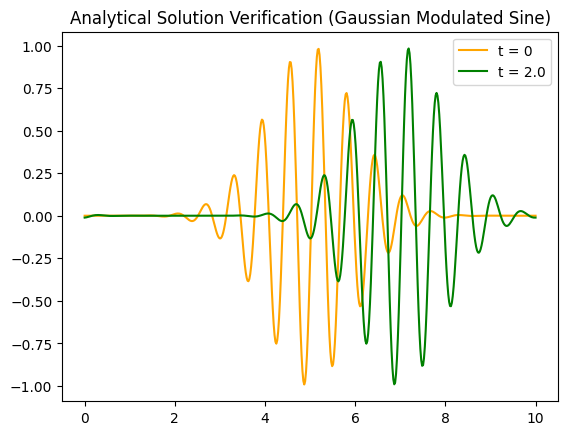

In [14]:
# Verification: (For the Step Function)
y_initial = gms(x)
y_final = adv_analytical_solution(gms, x, T)
plt.plot(x, y_initial, label="t = 0", color= "orange")
plt.plot(x, y_final, label=f"t = {T}", color = "green")
plt.title("Analytical Solution Verification (Gaussian Modulated Sine)")
plt.legend()
plt.show()

## Explicit Euler (FTCS) Scheme

Write the Discretized Advection Equation

Write the results of vNSA: Unconditionally Unstable

In [15]:
# Initializing Time-Step
nt = 1000 # Number of time steps
dt = T / nt

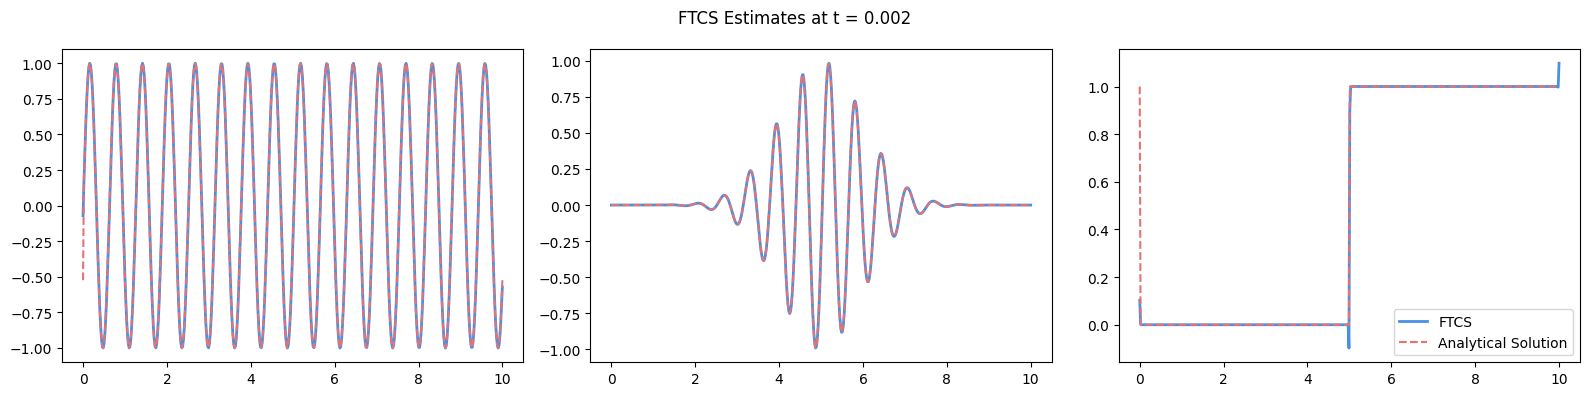

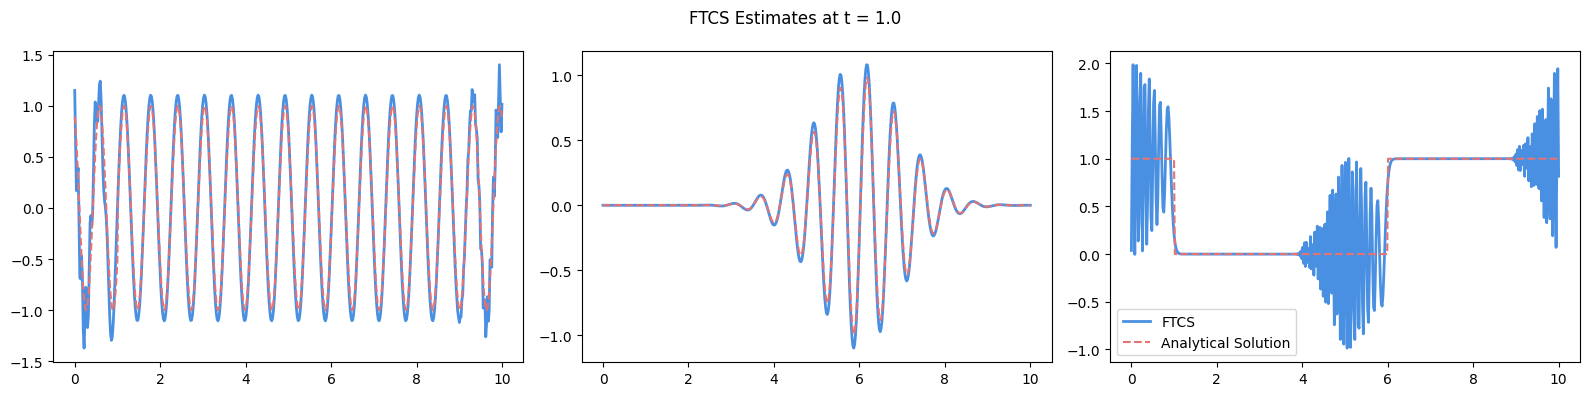

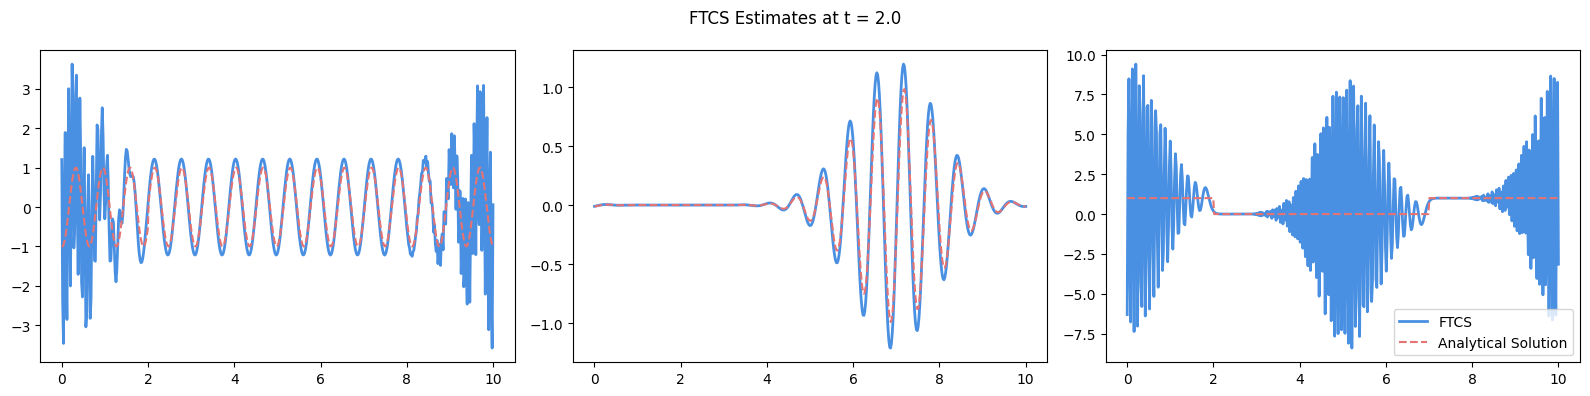

In [44]:
# Implementing the FTCS Scheme:
ftcs_sin = sin(x)
ftcs_gms = gms(x)
ftcs_step = step(x)
CFL = c*dt/dx

for timestep in range(nt+1):
    ftcs_gms_copy = ftcs_gms.copy()
    ftcs_sin_copy = ftcs_sin.copy()
    ftcs_step_copy = ftcs_step.copy()
    ftcs_gms[:] = ftcs_gms_copy[:] - 0.5 * CFL * (np.roll(ftcs_gms_copy, -1) - np.roll(ftcs_gms_copy, 1))
    ftcs_sin[:] = ftcs_sin_copy[:] - 0.5 * CFL * (np.roll(ftcs_sin_copy, -1) - np.roll(ftcs_sin_copy, 1))
    ftcs_step[:] = ftcs_step_copy[:] - 0.5 * CFL * (np.roll(ftcs_step_copy, -1) - np.roll(ftcs_step_copy, 1))
    # Time stepping
    if timestep in [1, nt//2, nt]:
        fig, (ftcs_sin_plt, ftcs_gms_plt, ftcs_step_plt) = plt.subplots(1, 3, figsize = (16, 4))
        fig.suptitle(f"FTCS Estimates at t = {timestep*dt}")

        ftcs_sin_plt.plot(x, ftcs_sin, label="FTCS", color="#4A90E2", linewidth = 2)
        ftcs_gms_plt.plot(x, ftcs_gms, label ="FTCS", color="#4A90E2", linewidth = 2)
        ftcs_step_plt.plot(x, ftcs_step, label= "FTCS",color="#4A90E2", linewidth = 2)


        ftcs_sin_plt.plot(x, adv_analytical_solution(sin, x, timestep * dt), linestyle ='--', label="Analytical Solution", color="#E57373")
        ftcs_gms_plt.plot(x, adv_analytical_solution(gms, x, timestep * dt), linestyle ='--', label="Analytical Solution", color="#E57373")
        ftcs_step_plt.plot(x, adv_analytical_solution(step, x, timestep*dt), linestyle = '--', label= "Analytical Solution", color="#E57373")
        plt.legend()
        plt.tight_layout()
        plt.show()



As you can see, the error builds up over time.

## Implicit Euler (BTCS) Scheme

Write the discretization here

In [45]:
# Initializing Time-Step
nt = 1000  # Number of time steps
dt = T / nt

In [46]:
# Initializing

imp_euler_sin = sin(x)
imp_euler_gms = gms(x)
imp_euler_step = step(x)
CFL = c * dt / dx
print(CFL)

0.1002


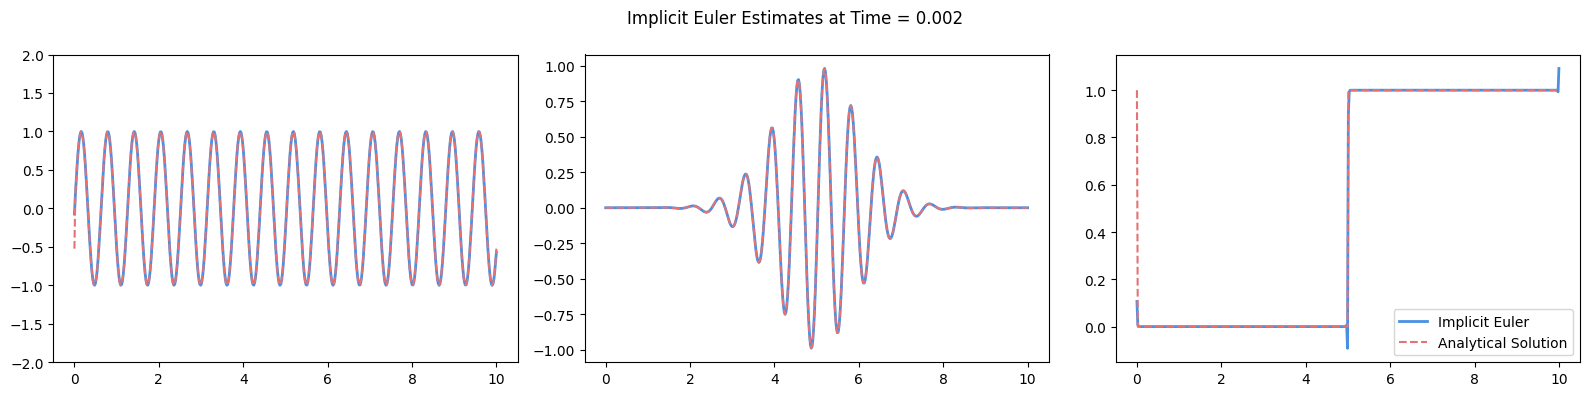

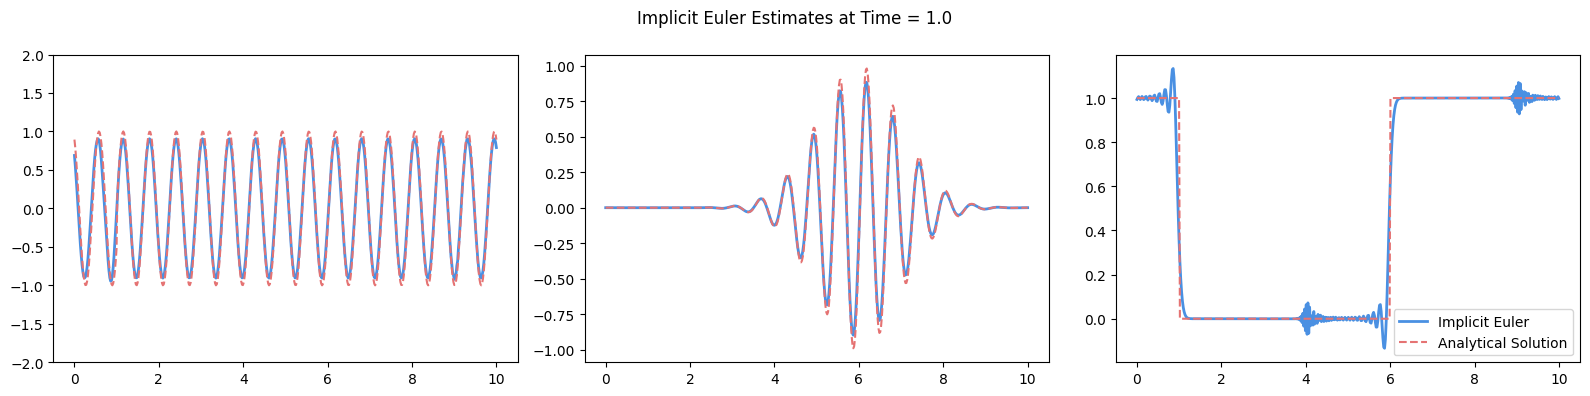

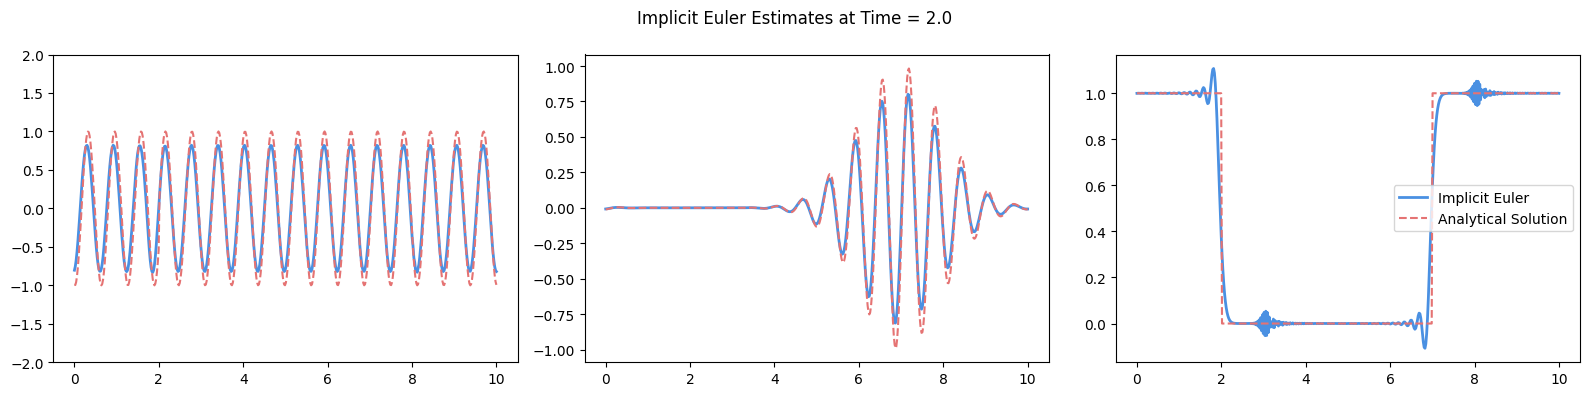

In [47]:
# Implementing the Implicit Euler Scheme

npts = len(x)
M = np.eye(npts)
upper = 0.5 * CFL
lower = -0.5 * CFL

for i in range(npts):
    M[i, (i+1) % npts] = upper
    M[i, (i-1) % npts] = lower

M_inv = np.linalg.inv(M)

for timestep in range(nt + 1):
    imp_euler_sin = M_inv @ imp_euler_sin
    imp_euler_gms = M_inv @ imp_euler_gms
    imp_euler_step = M_inv @ imp_euler_step

    if timestep in [1, nt//2, nt]:
        fig, (imp_euler_sin_plt, imp_euler_gms_plt, imp_euler_step_plt) = plt.subplots(1, 3, figsize = (16, 4))
        fig.suptitle(f"Implicit Euler Estimates at Time = {timestep*dt}")

        imp_euler_sin_plt.plot(x, imp_euler_sin, label="Implicit Euler", color="#4A90E2", linewidth = 2)
        imp_euler_gms_plt.plot(x, imp_euler_gms, label ="Implicit Euler", color="#4A90E2", linewidth = 2)
        imp_euler_step_plt.plot(x, imp_euler_step, label= "Implicit Euler", color="#4A90E2", linewidth = 2)
        imp_euler_sin_plt.set_ylim((-2,2))

        imp_euler_sin_plt.plot(x, adv_analytical_solution(sin, x, timestep * dt), linestyle ='--', label="Analytical Solution", color="#E57373")
        imp_euler_gms_plt.plot(x, adv_analytical_solution(gms, x, timestep * dt), linestyle ='--', label="Analytical Solution", color="#E57373")
        imp_euler_step_plt.plot(x, adv_analytical_solution(step, x, timestep*dt), linestyle = '--', label= "Analytical Solution", color="#E57373")

        plt.legend()
        plt.tight_layout()
        plt.savefig(f"BTCS_A_{timestep*dt:1.0f}.pdf")
        plt.show()

The errors, though they exist, don't seem to grow with time. In fact, the function has smoothened the discontinuities out to some extent. The errors "disperse" due to the phase speeds.

## Leapfrog Method

Write Discretization

Write Result of vNSA, and the CFL Condition

In [16]:
nt = 1000
dt = T / nt
CFL = c * dt / dx
if abs(CFL) > 1.0:
    print(f"Warning: |CFL| = {abs(CFL):.3f} > 1")
print(CFL)

0.1002


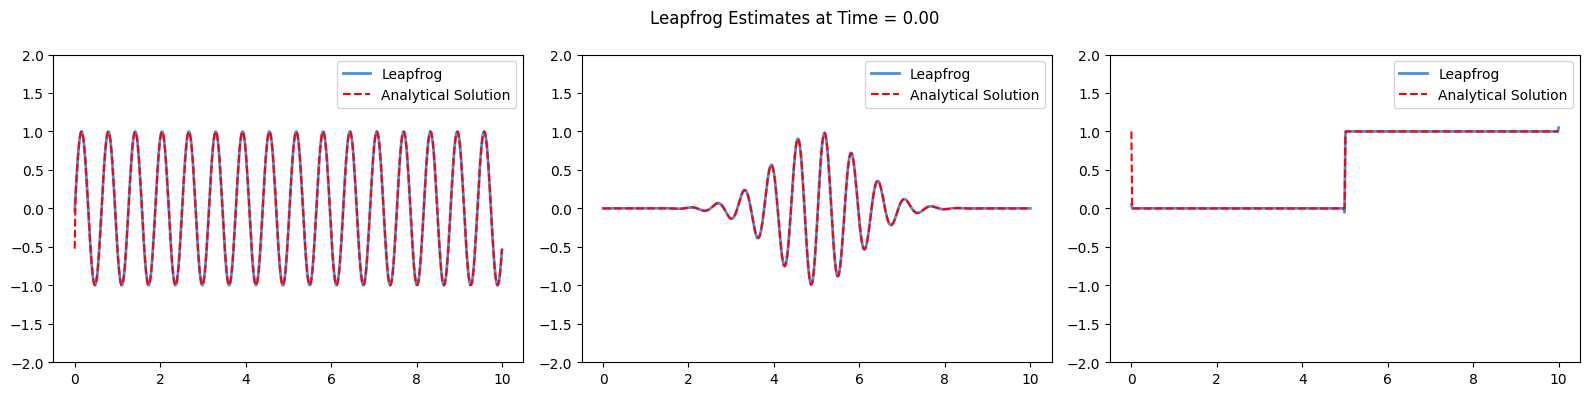

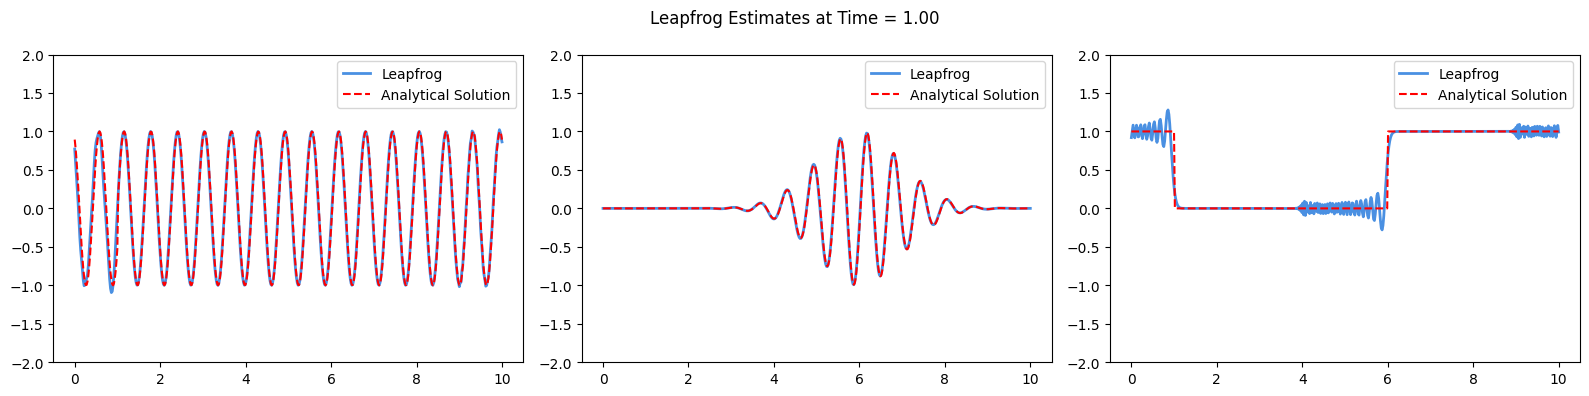

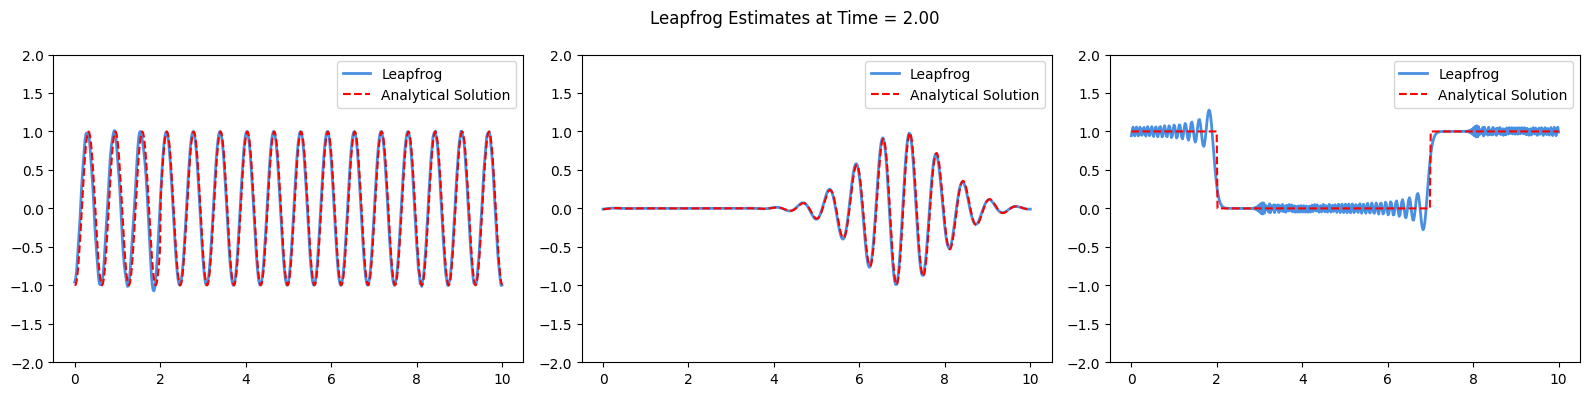

In [49]:
leap_sin_prev  = sin(x)
leap_gms_prev  = gms(x)
leap_step_prev = step(x)

leap_sin_curr  = leap_sin_prev  - 0.5*CFL*(np.roll(leap_sin_prev, -1)  - np.roll(leap_sin_prev, 1))
leap_gms_curr  = leap_gms_prev  - 0.5*CFL*(np.roll(leap_gms_prev, -1)  - np.roll(leap_gms_prev, 1))
leap_step_curr = leap_step_prev - 0.5*CFL*(np.roll(leap_step_prev, -1) - np.roll(leap_step_prev, 1))


for timesteps in range(1, nt + 1):

    if timesteps in [1, nt//2, nt]:
        fig, (leap_sin_plt, leap_gms_plt, leap_step_plt) = plt.subplots(1, 3, figsize=(16, 4))
        fig.suptitle(f"Leapfrog Estimates at Time = {timesteps*dt:.02f}")

        leap_sin_plt.plot(x, leap_sin_curr, color="#4A90E2", label="Leapfrog", linewidth = 2)
        leap_gms_plt.plot(x, leap_gms_curr, color="#4A90E2", label="Leapfrog", linewidth = 2)
        leap_step_plt.plot(x, leap_step_curr, color="#4A90E2", label="Leapfrog", linewidth = 2)

        leap_sin_plt.set_ylim((-2, 2))
        leap_gms_plt.set_ylim((-2, 2))
        leap_step_plt.set_ylim((-2, 2))

        leap_sin_plt.plot(x, adv_analytical_solution(sin, x, timesteps * dt), '--', color="red", label="Analytical Solution")
        leap_gms_plt.plot(x, adv_analytical_solution(gms, x, timesteps * dt), '--', color="red", label="Analytical Solution")
        leap_step_plt.plot(x, adv_analytical_solution(step, x, timesteps*dt), '--', color="red", label="Analytical Solution")

        leap_sin_plt.legend(); leap_gms_plt.legend(); leap_step_plt.legend()
        plt.tight_layout()
        plt.show()


    # leapfrog update:
    new_sin  = leap_sin_prev  - CFL * (np.roll(leap_sin_curr, -1)  - np.roll(leap_sin_curr, 1))
    new_gms  = leap_gms_prev  - CFL * (np.roll(leap_gms_curr, -1)  - np.roll(leap_gms_curr, 1))
    new_step = leap_step_prev - CFL * (np.roll(leap_step_curr, -1) - np.roll(leap_step_curr, 1))

    # shift forward
    leap_sin_prev,  leap_sin_curr  = leap_sin_curr,  new_sin
    leap_gms_prev,  leap_gms_curr  = leap_gms_curr,  new_gms
    leap_step_prev, leap_step_curr = leap_step_curr, new_step

## Lax Friedrich Scheme

In [20]:
nt = 200
dt = T/ nt
CFL = c * dt / dx
print(CFL)
if abs(CFL) > 1.0:
    print(f"Warning: |CFL| > 1. Too high, might lead to numerical instabilities.")
if abs(CFL) < 0.05:
    print(f"Warning: |CFL| < 0.05. Too low, might lead to numerical damping")


0.501


In [21]:
lf_sin  = sin(x).copy()
lf_gms  = gms(x).copy()
lf_step = step(x).copy()

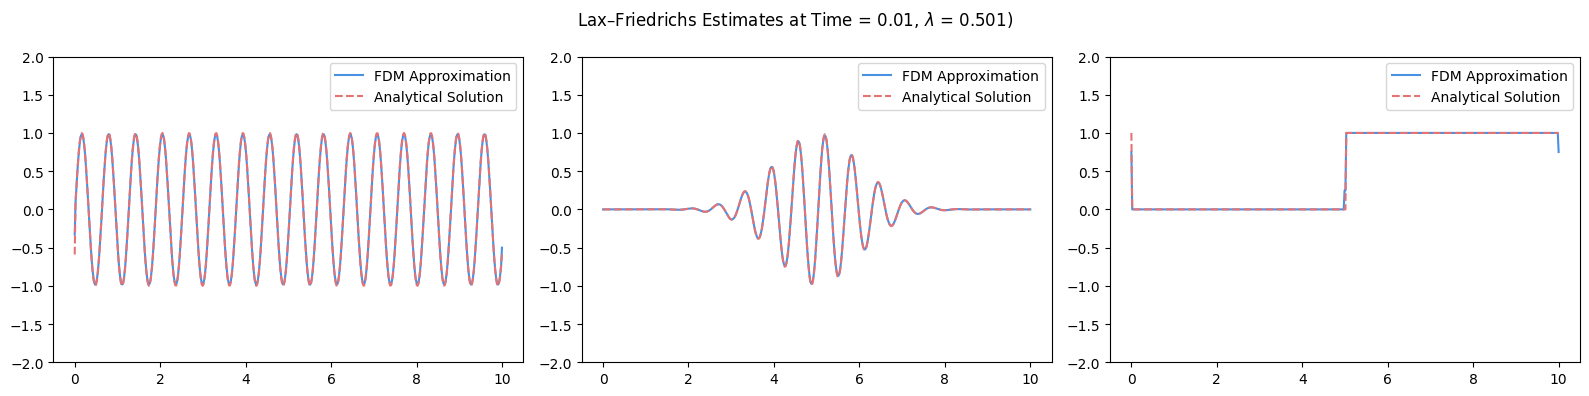

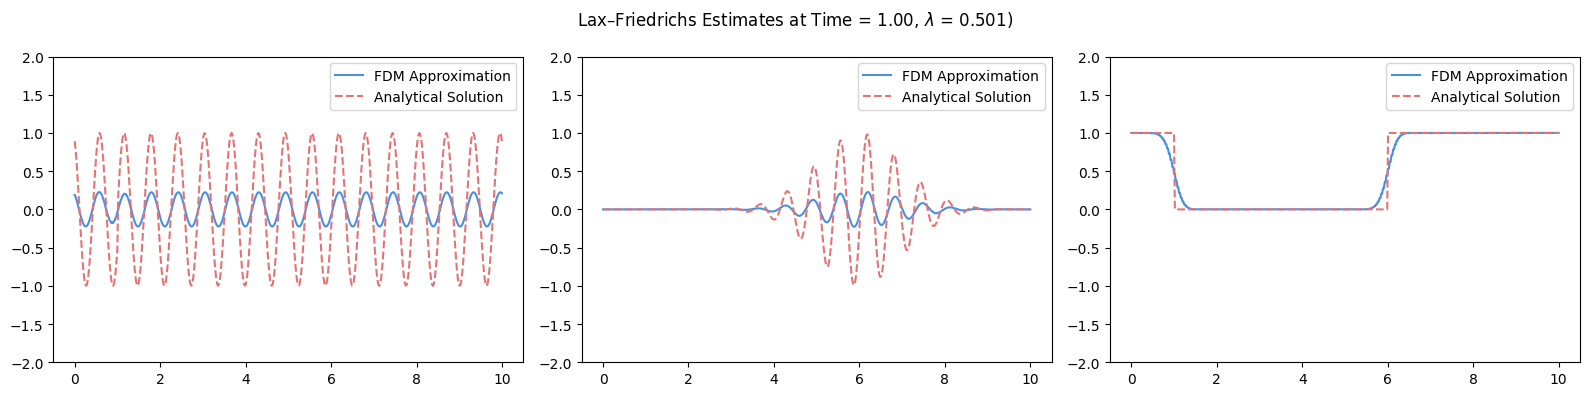

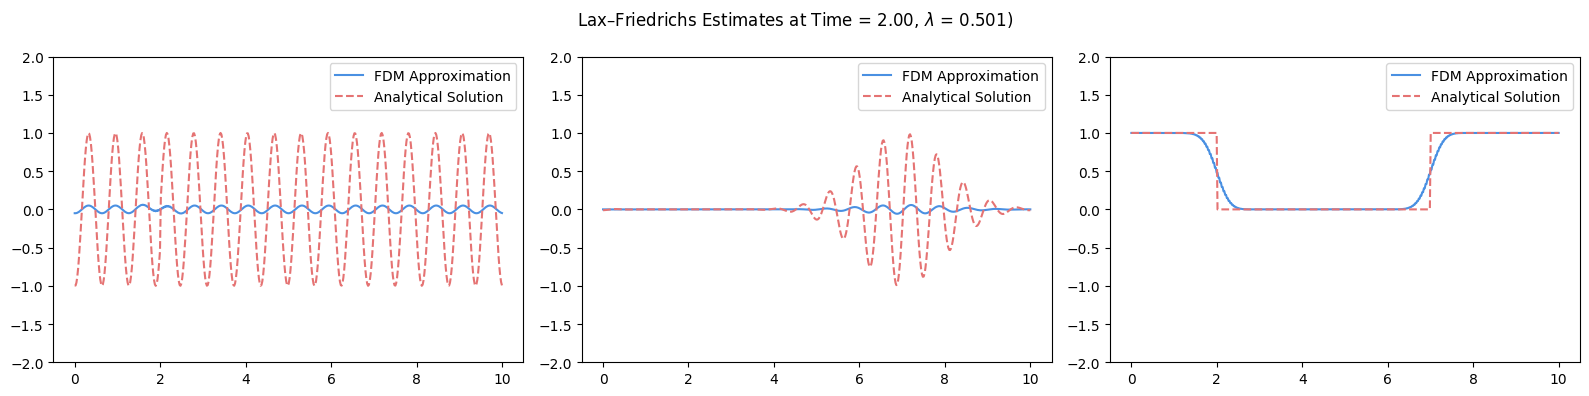

In [22]:
# Implementing Lax-Friedrich Scheme

for timesteps in range(1, nt + 1):
    lf_sin_copy  = lf_sin.copy()
    lf_gms_copy  = lf_gms.copy()
    lf_step_copy = lf_step.copy()

    lf_sin  = 0.5*(np.roll(lf_sin_copy, -1) + np.roll(lf_sin_copy, 1)) - 0.5 * CFL * (np.roll(lf_sin_copy, -1) - np.roll(lf_sin_copy, 1))
    lf_gms  = 0.5*(np.roll(lf_gms_copy, -1) + np.roll(lf_gms_copy, 1)) - 0.5 * CFL * (np.roll(lf_gms_copy, -1) - np.roll(lf_gms_copy, 1))
    lf_step = 0.5*(np.roll(lf_step_copy, -1) + np.roll(lf_step_copy, 1)) - 0.5 * CFL * (np.roll(lf_step_copy, -1) - np.roll(lf_step_copy, 1))

    # Plot at the same selection of steps as your leapfrog/implicit blocks
    if timesteps in [1, nt//2, nt]:
        fig, (lf_sin_plt, lf_gms_plt, lf_step_plt) = plt.subplots(1, 3, figsize=(16, 4))
        fig.suptitle(f"Lax–Friedrichs Estimates at Time = {timesteps*dt:.2f}," + r" $\lambda$" + f" = {CFL:.3f})")

        lf_sin_plt.plot(x, lf_sin, label="FDM Approximation", color="#4A90E2")
        lf_gms_plt.plot(x, lf_gms, label="FDM Approximation", color="#4A90E2")
        lf_step_plt.plot(x, lf_step, label="FDM Approximation", color="#4A90E2")

        lf_sin_plt.set_ylim((-2, 2))
        lf_gms_plt.set_ylim((-2, 2))
        lf_step_plt.set_ylim((-2, 2))

        lf_sin_plt.plot(x, adv_analytical_solution(sin, x, timesteps * dt), linestyle='--', label="Analytical Solution", color="#E57373")
        lf_gms_plt.plot(x, adv_analytical_solution(gms, x, timesteps * dt), linestyle='--', label="Analytical Solution", color="#E57373")
        lf_step_plt.plot(x, adv_analytical_solution(step, x, timesteps * dt), linestyle='--', label="Analytical Solution", color="#E57373")

        lf_sin_plt.legend()
        lf_gms_plt.legend()
        lf_step_plt.legend()
        plt.tight_layout()
        plt.show()

As you can see, if you set CFL near 1, you get very accurate approximations, if you set it too low, the solution is damped, and if you set it too high, you get instabilities.

Though the solution is damped, the errors don't grow and the solution is stable and well behaved.

## Lax Wendroff

In [33]:
nt = 101
dt = T/nt
CFL = c * dt / dx
print(f"Lax-Wendroff: CFL = {CFL:.2f}")

Lax-Wendroff: CFL = 0.99


In [34]:
lw_sin  = sin(x).copy()
lw_gms  = gms(x).copy()
lw_step = step(x).copy()

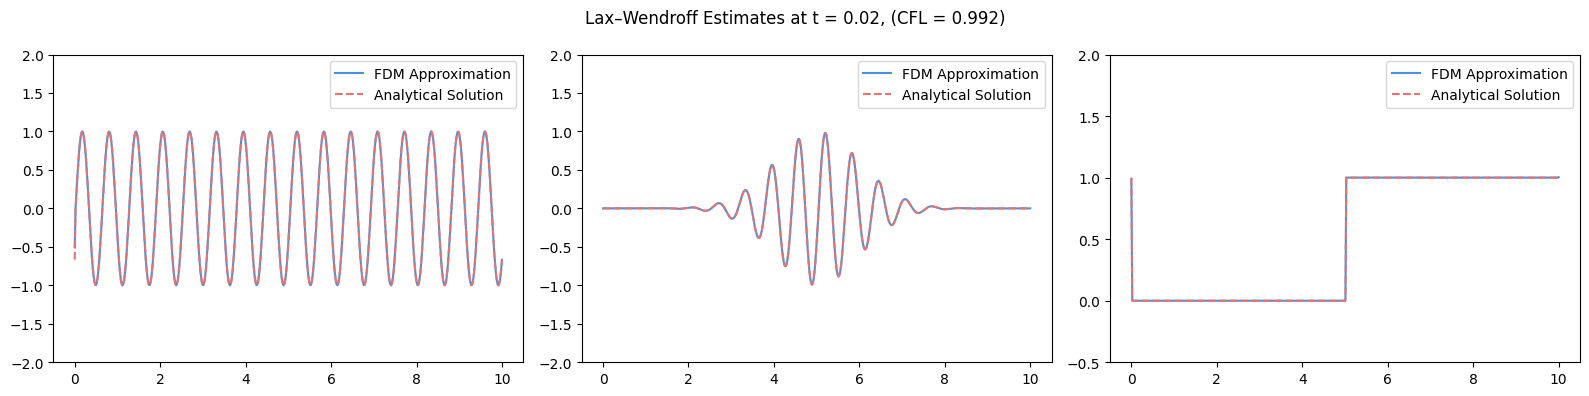

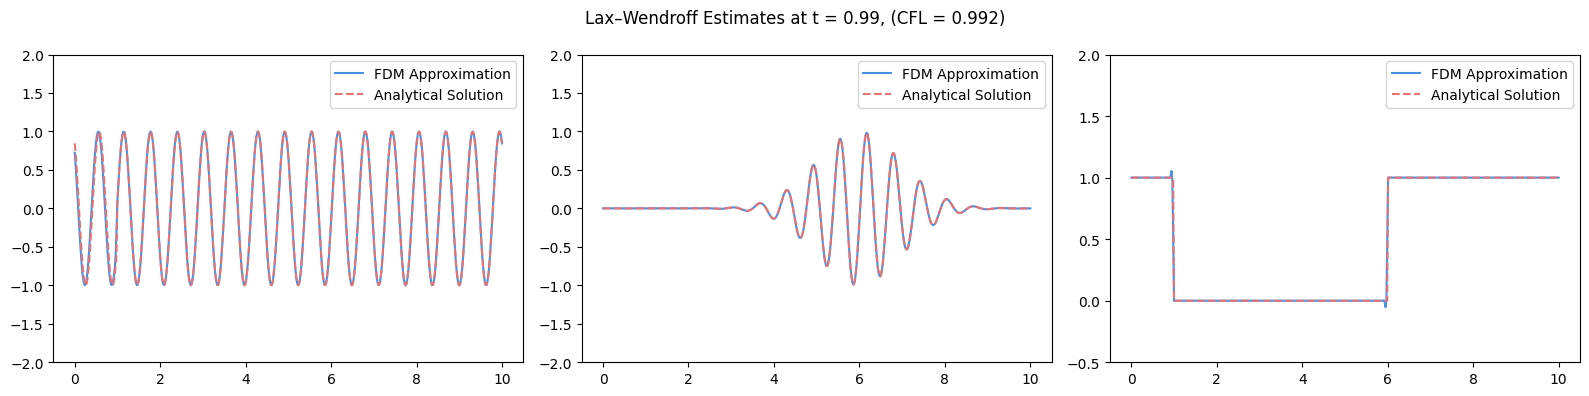

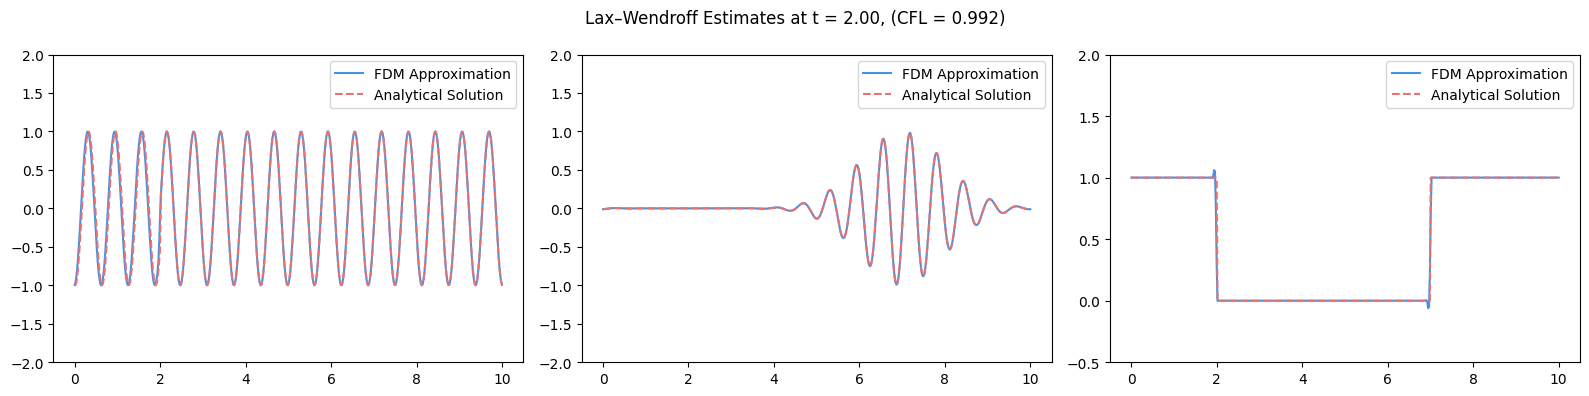

In [35]:
for timesteps in range(1, nt + 1):

    sin_prev_point = np.roll(lw_sin, -1)
    sin_next_point = np.roll(lw_sin, 1)
    gms_prev_point = np.roll(lw_gms, -1)
    gms_next_point = np.roll(lw_gms, 1)
    step_prev_point = np.roll(lw_step, -1)
    step_next_point = np.roll(lw_step, 1)

    new_sin  = lw_sin - 0.5 * CFL * (sin_prev_point - sin_next_point) + 0.5 * CFL ** 2 * (sin_prev_point - 2 * lw_sin + sin_next_point)
    new_gms  = lw_gms - 0.5 * CFL * (gms_prev_point - gms_next_point) + 0.5 * CFL ** 2 * (gms_prev_point - 2 * lw_gms + gms_next_point)
    new_step = lw_step - 0.5 * CFL * (step_prev_point - step_next_point) + 0.5 * CFL ** 2 * (step_prev_point - 2 * lw_step + step_next_point)

    lw_sin, lw_gms, lw_step = new_sin, new_gms, new_step

    if timesteps in [1, nt//2, nt]:
        fig, (lw_sin_plt, lw_gms_plt, lw_step_plt) = plt.subplots(1, 3, figsize=(16, 4))
        fig.suptitle(f"Lax–Wendroff Estimates at t = {timesteps*dt:.2f}, (CFL = {CFL:.3f})")

        lw_sin_plt.plot(x, lw_sin, label="FDM Approximation", color="#4A90E2")
        lw_gms_plt.plot(x, lw_gms, label="FDM Approximation", color="#4A90E2")
        lw_step_plt.plot(x, lw_step, label="FDM Approximation", color="#4A90E2")

        lw_sin_plt.set_ylim((-2, 2))
        lw_gms_plt.set_ylim((-2, 2))
        lw_step_plt.set_ylim((-0.5, 2))

        lw_sin_plt.plot(x, adv_analytical_solution(sin, x, timesteps * dt), linestyle='--', label="Analytical Solution", color="#E57373")
        lw_gms_plt.plot(x, adv_analytical_solution(gms, x, timesteps * dt), linestyle='--', label="Analytical Solution", color="#E57373")
        lw_step_plt.plot(x, adv_analytical_solution(step, x, timesteps * dt), linestyle='--', label="Analytical Solution", color="#E57373")

        lw_sin_plt.legend()
        lw_gms_plt.legend()
        lw_step_plt.legend()
        plt.tight_layout()
        plt.show()


# Heat Equation

Write the heat equation

## Toy Problem


Elaborate the toy problem

## Analytical Solution

In [38]:
nx = 100
x = np.linspace(0, 10, nx+ 2)
dx = 10/(nx +1)
alpha = 1.0
T = 10

In [39]:
def heat_analytical_solution(func, x, t, alpha):
    u0 = func(x)
    # wave numbers for numpy FFT
    k = 2.0 * np.pi * np.fft.fftfreq(nx+2, d=dx)  # shape (N,)
    u0_hat = np.fft.fft(u0)
    # exact time evolution in Fourier space
    u_hat_t = u0_hat * np.exp(-alpha * (k**2) * t)
    u_t = np.fft.ifft(u_hat_t).real
    return u_t

## FTCS Scheme

In [40]:
nt = 10000

dt = T/nt
r = alpha * dt / dx**2
print(r)
if r > 0.5:
    print(f"Warning: Unstable FTCS: r = {r:.4f} > 0.5. Reduce dt or increase dx.")

0.10200999999999999


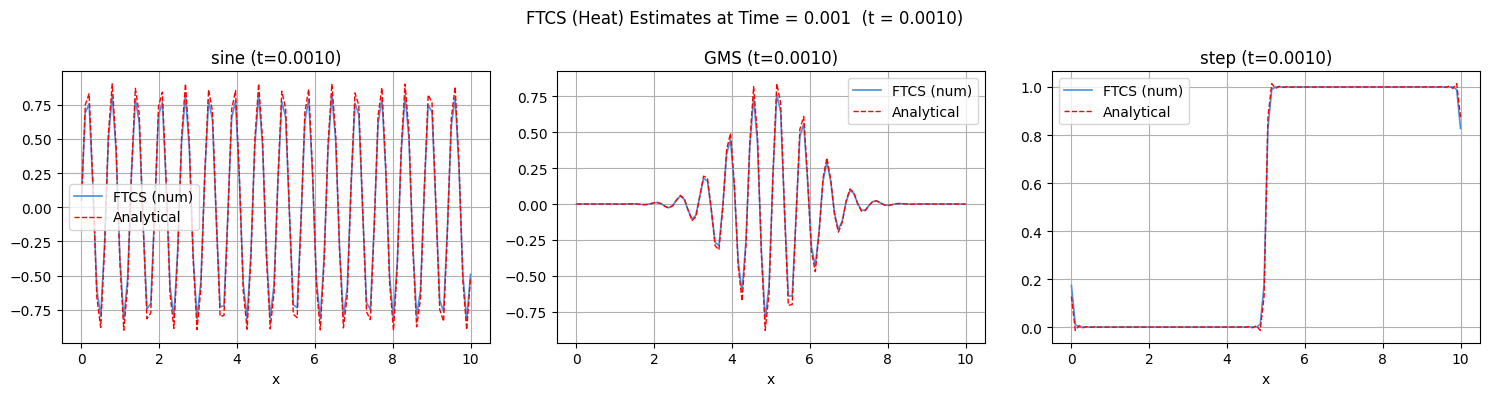

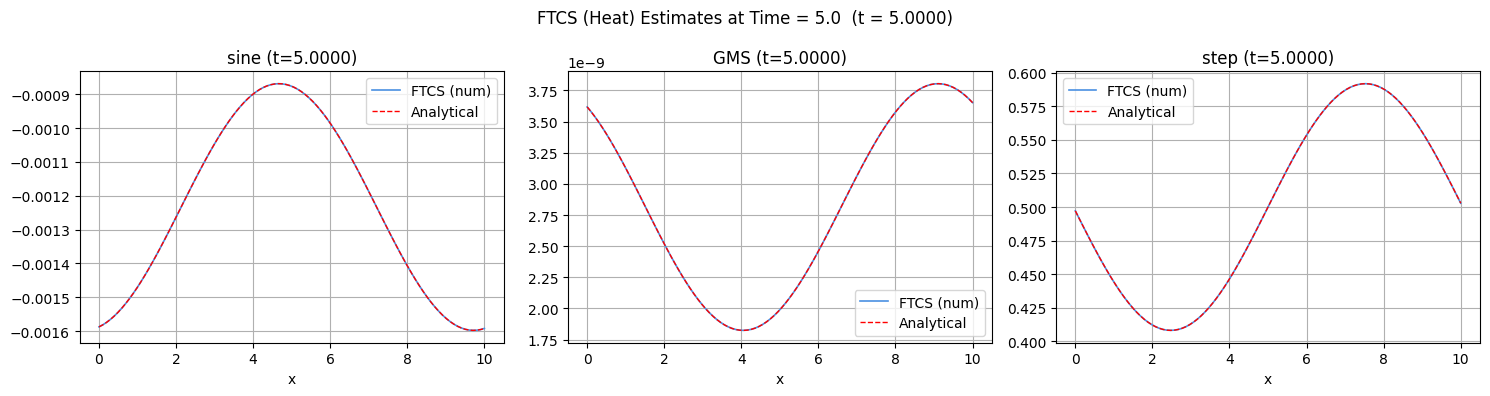

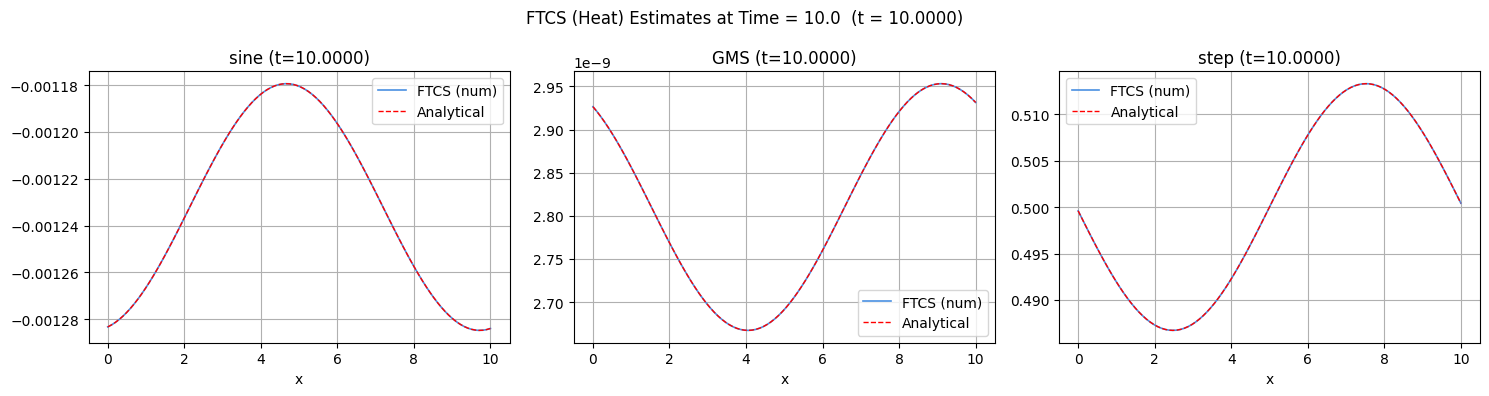

In [41]:
ftcs_sin  = sin(x)
ftcs_gms  = gms(x)
ftcs_step = step(x)


# FTCS time stepping loop (explicit diffusion update)
for timestep in range(nt + 1):
    ftcs_sin_copy  = ftcs_sin.copy()
    ftcs_gms_copy  = ftcs_gms.copy()
    ftcs_step_copy = ftcs_step.copy()

    # FTCS update:
    ftcs_sin[:]  = ftcs_sin_copy  + r * (np.roll(ftcs_sin_copy, -1) - 2.0 * ftcs_sin_copy + np.roll(ftcs_sin_copy, 1))
    ftcs_gms[:]  = ftcs_gms_copy  + r * (np.roll(ftcs_gms_copy, -1) - 2.0 * ftcs_gms_copy + np.roll(ftcs_gms_copy, 1))
    ftcs_step[:] = ftcs_step_copy + r * (np.roll(ftcs_step_copy, -1) - 2.0 * ftcs_step_copy + np.roll(ftcs_step_copy, 1))

    if timestep in [1, nt//2, nt]:
        t_now = timestep * dt
        fig, (ax_sin, ax_gms, ax_step) = plt.subplots(1, 3, figsize=(15, 4))
        fig.suptitle(f"FTCS (Heat) Estimates at Time = {timestep*dt:0}  (t = {t_now:.4f})")

        # numerical
        ax_sin.plot(x, ftcs_sin,  label="FTCS (num)", linewidth=1.2, color="#4A90E2")
        ax_gms.plot(x, ftcs_gms,  label="FTCS (num)", linewidth=1.2, color="#4A90E2")
        ax_step.plot(x, ftcs_step,label="FTCS (num)", linewidth=1.2, color="#4A90E2")

        # analytic (via FFT evolution)
        u_sin_exact  = heat_analytical_solution(sin, x, t_now, alpha=alpha)
        u_gms_exact  = heat_analytical_solution(gms, x, t_now, alpha=alpha)
        u_step_exact = heat_analytical_solution(step, x, t_now, alpha=alpha)

        ax_sin.plot(x, u_sin_exact,   linestyle='--', label="Analytical", linewidth=1.0, color = "red")
        ax_gms.plot(x, u_gms_exact,   linestyle='--', label="Analytical", linewidth=1.0, color = "red")
        ax_step.plot(x, u_step_exact, linestyle='--', label="Analytical", linewidth=1.0, color = "red")


        ax_sin.set_title(f"sine (t={t_now:.4f})")
        ax_gms.set_title(f"GMS (t={t_now:.4f})")
        ax_step.set_title(f"step (t={t_now:.4f})")

        for ax in (ax_sin, ax_gms, ax_step):
            ax.legend()
            ax.grid(True)
            ax.set_xlabel('x')

        plt.tight_layout()
        plt.show()


## BTCS Scheme

In [60]:
nt = 100

dt = T / nt
r = alpha * dt / dx ** 2
print(r)

10.200999999999999


BTCS: alpha=1.0, dx=9.9010e-02, dt=1.0000e-01, r=10.201000


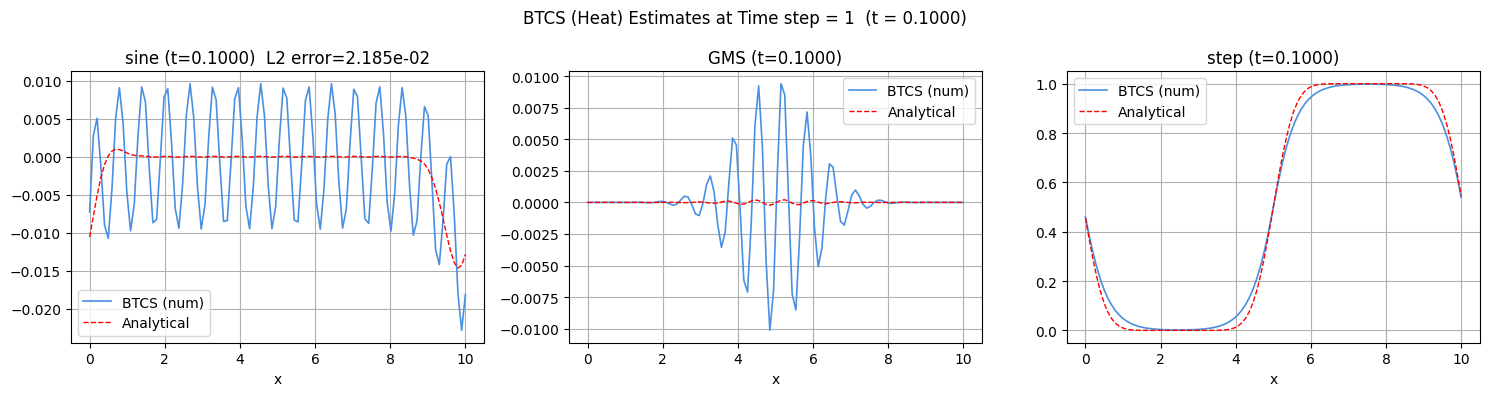

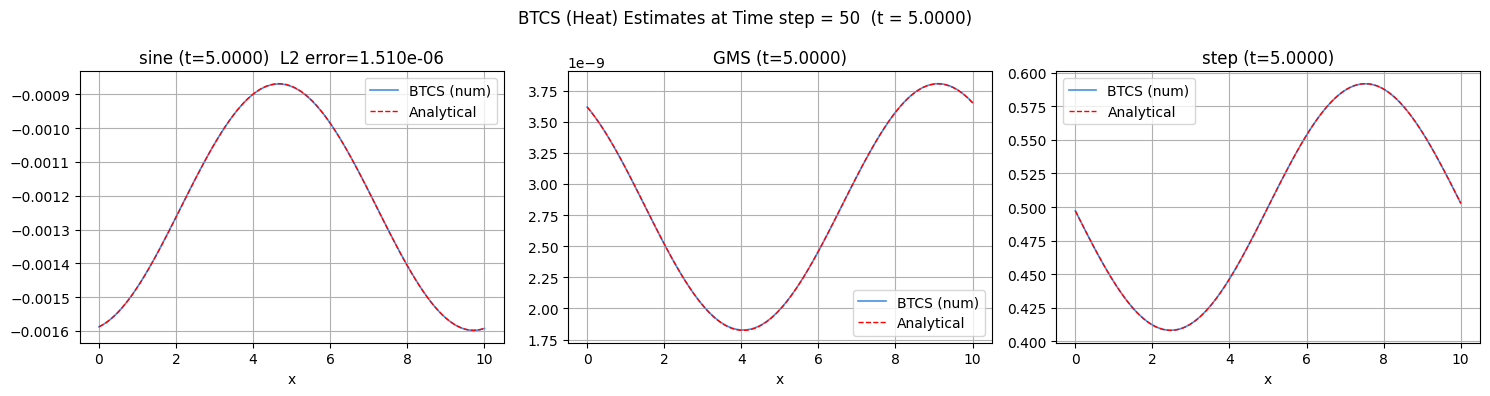

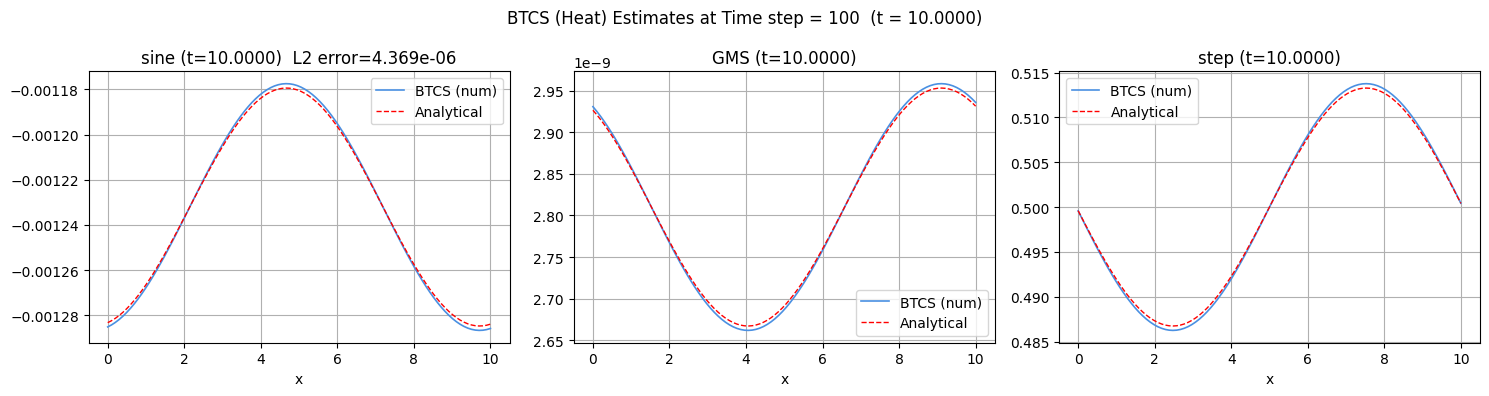

In [61]:
r = alpha * dt / dx**2
print(f"BTCS: alpha={alpha}, dx={dx:.4e}, dt={dt:.4e}, r={r:.6f}")

# initialize fields
btcs_sin  = np.asarray(sin(x), dtype=np.float64)
btcs_gms  = np.asarray(gms(x), dtype=np.float64)
btcs_step = np.asarray(step(x), dtype=np.float64)

N = x.size

# Build the periodic tridiagonal matrix A for BTCS:
# A = I + r * D  where D is the discrete Laplacian: D_i,i = 2, D_i,i+/-1 = -1
# So A diag = 1 + 2r, off-diags = -r, with periodic corners -r.
main_diag = (1.0 + 2.0 * r) * np.ones(N, dtype=np.float64)
off_diag  = -r * np.ones(N-1, dtype=np.float64)

# Assemble full matrix (dense). For moderate Nx (<= ~2000) this is fine.
A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
# periodic corners
A[0, -1] = -r
A[-1, 0] = -r

# Optionally: pre-check conditioning or factorize (we'll just call np.linalg.solve repeatedly).
# You can compute an LU factorization with scipy.sparse.linalg.splu for efficiency if needed.

# time stepping
for timestep in range(nt + 1):
    # construct RHS = u^n
    rhs_sin  = btcs_sin.copy()
    rhs_gms  = btcs_gms.copy()
    rhs_step = btcs_step.copy()

    # Solve A u^{n+1} = rhs  (implicit step)
    # Using np.linalg.solve (dense). Replace with sparse solver for large N.
    btcs_sin  = np.linalg.solve(A, rhs_sin)
    btcs_gms  = np.linalg.solve(A, rhs_gms)
    btcs_step = np.linalg.solve(A, rhs_step)

    # snapshots & plotting (same style as your FTCS code)
    if timestep in [1, nt//2, nt]:
        t_now = timestep * dt
        fig, (ax_sin, ax_gms, ax_step) = plt.subplots(1, 3, figsize=(15, 4))
        fig.suptitle(f"BTCS (Heat) Estimates at Time step = {timestep}  (t = {t_now:.4f})")

        # numerical
        ax_sin.plot(x, btcs_sin,  label="BTCS (num)", linewidth=1.2, color="#4A90E2")
        ax_gms.plot(x, btcs_gms,  label="BTCS (num)", linewidth=1.2, color="#4A90E2")
        ax_step.plot(x, btcs_step,label="BTCS (num)", linewidth=1.2, color="#4A90E2")

        # analytic (via FFT evolution)
        u_sin_exact  = heat_analytical_solution(sin, x, t_now, alpha=alpha)
        u_gms_exact  = heat_analytical_solution(gms, x, t_now, alpha=alpha)
        u_step_exact = heat_analytical_solution(step, x, t_now, alpha=alpha)

        ax_sin.plot(x, u_sin_exact,   linestyle='--', label="Analytical", linewidth=1.0, color="red")
        ax_gms.plot(x, u_gms_exact,   linestyle='--', label="Analytical", linewidth=1.0, color="red")
        ax_step.plot(x, u_step_exact, linestyle='--', label="Analytical", linewidth=1.0, color="red")

        ax_sin.set_title(f"sine (t={t_now:.4f})")
        ax_gms.set_title(f"GMS (t={t_now:.4f})")
        ax_step.set_title(f"step (t={t_now:.4f})")

        # optional L2 error for a sanity check (sine)
        dx_local = x[1] - x[0]
        L2_sin = np.sqrt(np.sum((btcs_sin - u_sin_exact)**2) * dx_local)
        ax_sin.set_title(f"sine (t={t_now:.4f})  L2 error={L2_sin:.3e}")

        for ax in (ax_sin, ax_gms, ax_step):
            ax.legend()
            ax.grid(True)
            ax.set_xlabel('x')

        plt.tight_layout()
        plt.show()

## Crank Nicolson Scheme

In [62]:
nt = 10000
dt = T / nt
r = alpha * dt / dx ** 2
print(r)

0.10200999999999999


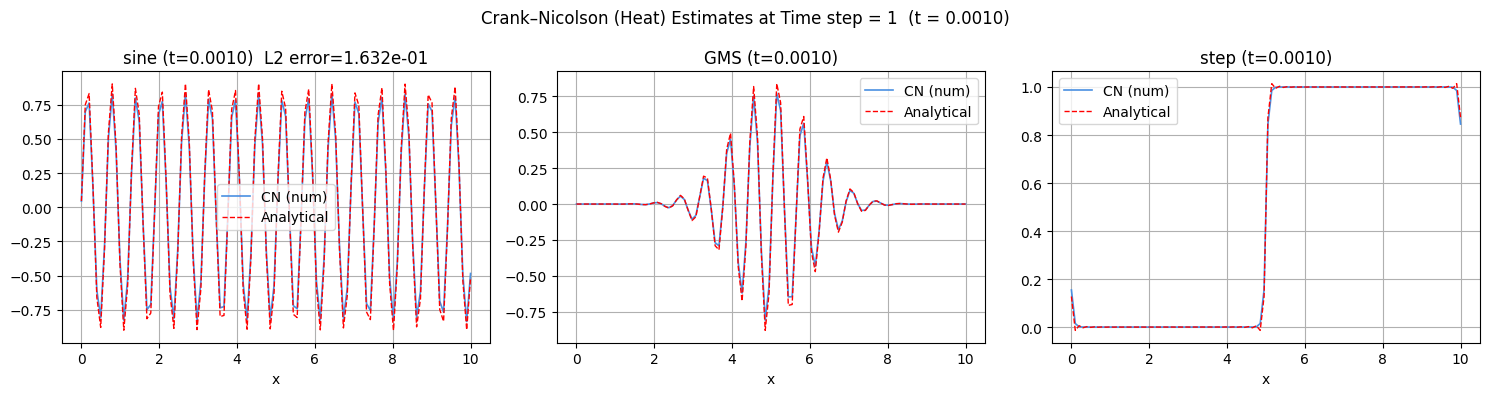

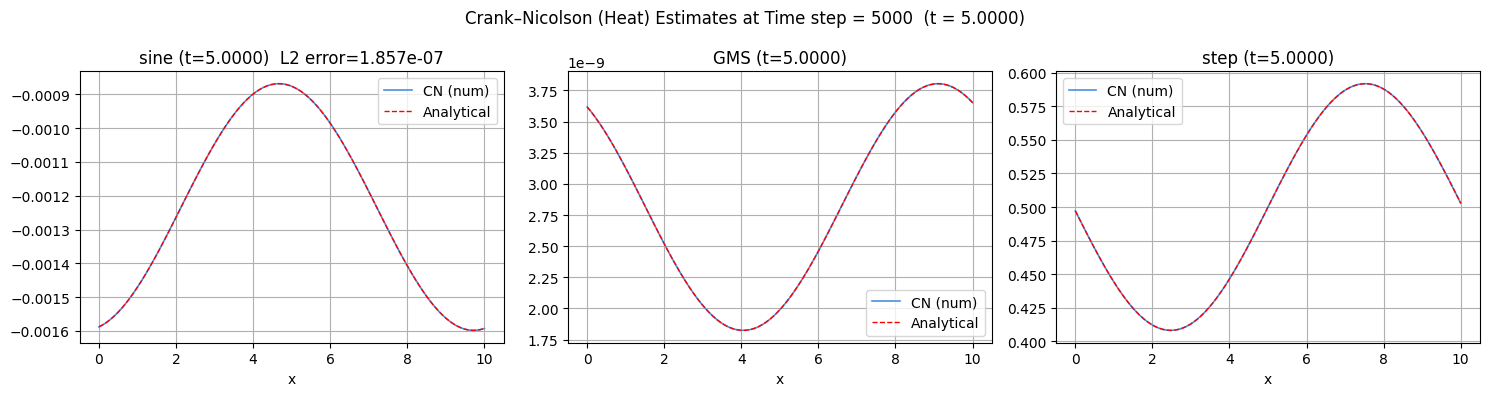

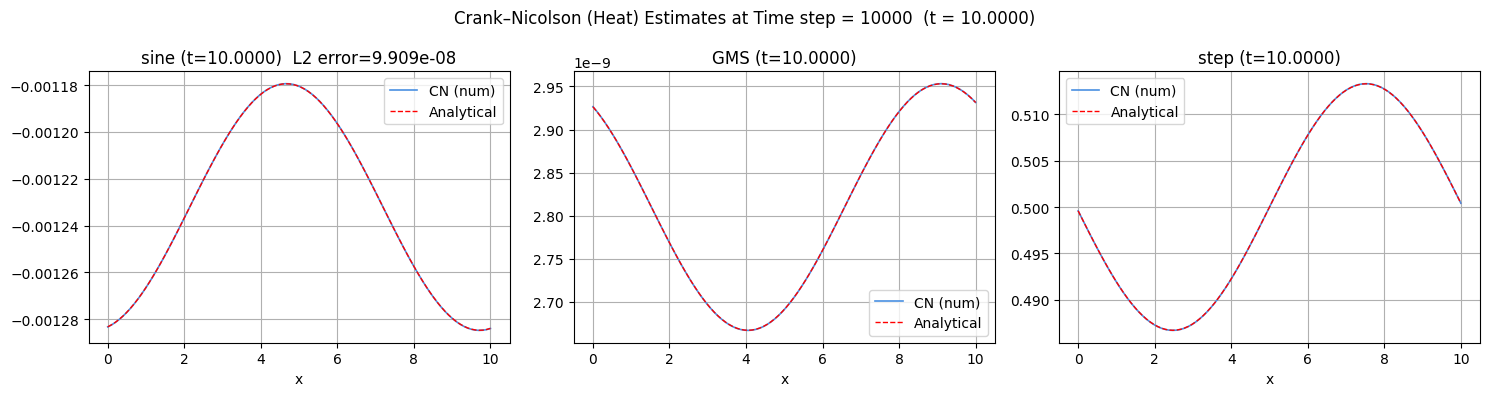

In [63]:
cn_sin  = sin(x)
cn_gms  = gms(x)
cn_step = step(x)

N = x.size

# Build CN matrices A = I - (r/2) L, B = I + (r/2) L
# where L has diag = -2, off-diags = 1 (periodic)
main_A = (1.0 + r) * np.ones(N, dtype=np.float64)   # 1 - (r/2)*(-2) = 1 + r
off_A  = -0.5 * r * np.ones(N-1, dtype=np.float64)  # -(r/2)*1 = -r/2

main_B = (1.0 - r) * np.ones(N, dtype=np.float64)   # 1 + (r/2)*(-2) = 1 - r
off_B  =  0.5 * r * np.ones(N-1, dtype=np.float64)  # (r/2)*1 = r/2

# Assemble dense matrices (fine for Nx ~ few thousands)
A = np.diag(main_A) + np.diag(off_A, k=1) + np.diag(off_A, k=-1)
B = np.diag(main_B) + np.diag(off_B, k=1) + np.diag(off_B, k=-1)

# periodic corners
A[0, -1] = off_A[-1]
A[-1, 0] = off_A[-1]
B[0, -1] = off_B[-1]
B[-1, 0] = off_B[-1]

# (Optional) small sanity-check: A should be nonsingular for r>=0 (CN is unconditionally stable)
# np.linalg.cond(A)  # can inspect condition number if you like

# Time-stepping
for timestep in range(nt + 1):
    # RHS = B @ u^n
    rhs_sin  = B.dot(cn_sin)
    rhs_gms  = B.dot(cn_gms)
    rhs_step = B.dot(cn_step)

    # Solve A u^{n+1} = rhs
    cn_sin  = np.linalg.solve(A, rhs_sin)
    cn_gms  = np.linalg.solve(A, rhs_gms)
    cn_step = np.linalg.solve(A, rhs_step)

    # snapshots & plotting (same style as your other code)
    if timestep in [1, nt//2, nt]:
        t_now = timestep * dt
        fig, (ax_sin, ax_gms, ax_step) = plt.subplots(1, 3, figsize=(15, 4))
        fig.suptitle(f"Crank–Nicolson (Heat) Estimates at Time step = {timestep}  (t = {t_now:.4f})")

        # numerical
        ax_sin.plot(x, cn_sin,  label="CN (num)", linewidth=1.2, color="#4A90E2")
        ax_gms.plot(x, cn_gms,  label="CN (num)", linewidth=1.2, color="#4A90E2")
        ax_step.plot(x, cn_step,label="CN (num)", linewidth=1.2, color="#4A90E2")

        # analytic (via FFT evolution)
        u_sin_exact  = heat_analytical_solution(sin, x, t_now, alpha=alpha)
        u_gms_exact  = heat_analytical_solution(gms, x, t_now, alpha=alpha)
        u_step_exact = heat_analytical_solution(step, x, t_now, alpha=alpha)

        ax_sin.plot(x, u_sin_exact,   linestyle='--', label="Analytical", linewidth=1.0, color="red")
        ax_gms.plot(x, u_gms_exact,   linestyle='--', label="Analytical", linewidth=1.0, color="red")
        ax_step.plot(x, u_step_exact, linestyle='--', label="Analytical", linewidth=1.0, color="red")

        # optional L2 error for sine
        dx_local = x[1] - x[0]
        L2_sin = np.sqrt(np.sum((cn_sin - u_sin_exact)**2) * dx_local)
        ax_sin.set_title(f"sine (t={t_now:.4f})  L2 error={L2_sin:.3e}")
        ax_gms.set_title(f"GMS (t={t_now:.4f})")
        ax_step.set_title(f"step (t={t_now:.4f})")

        for ax in (ax_sin, ax_gms, ax_step):
            ax.legend()
            ax.grid(True)
            ax.set_xlabel('x')
        plt.tight_layout()
        plt.show()

## General $ \theta $ Method

In [64]:
theta = 0.25   # change as needed: 0, 0.5, 1.0, etc.

In [65]:
nt = 10000
dt = T / nt
r = alpha * dt / dx ** 2
print(r)

0.10200999999999999


theta=0.25 (explicit-leaning). r=0.10201 <= 1 


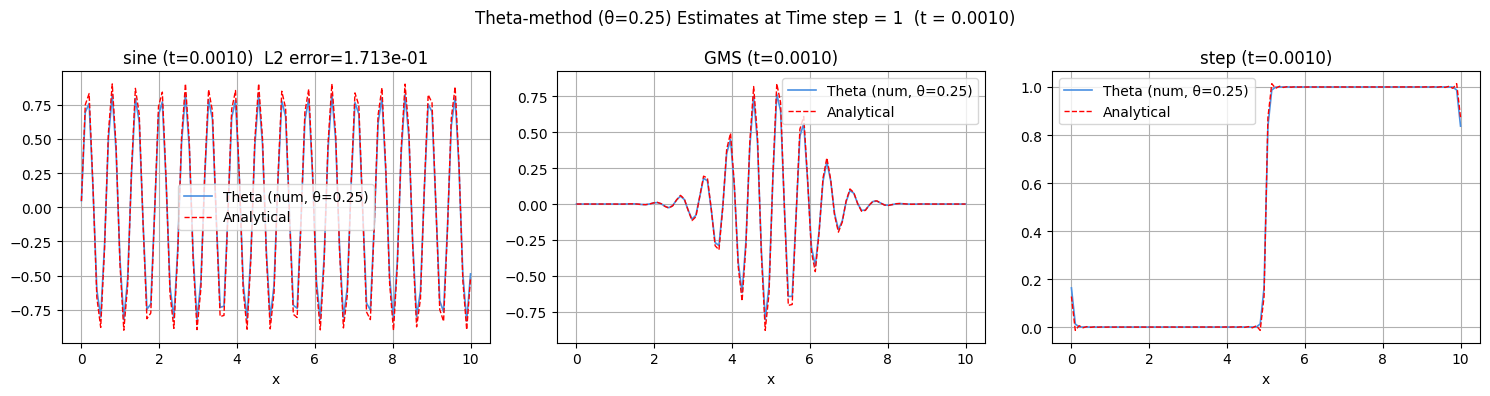

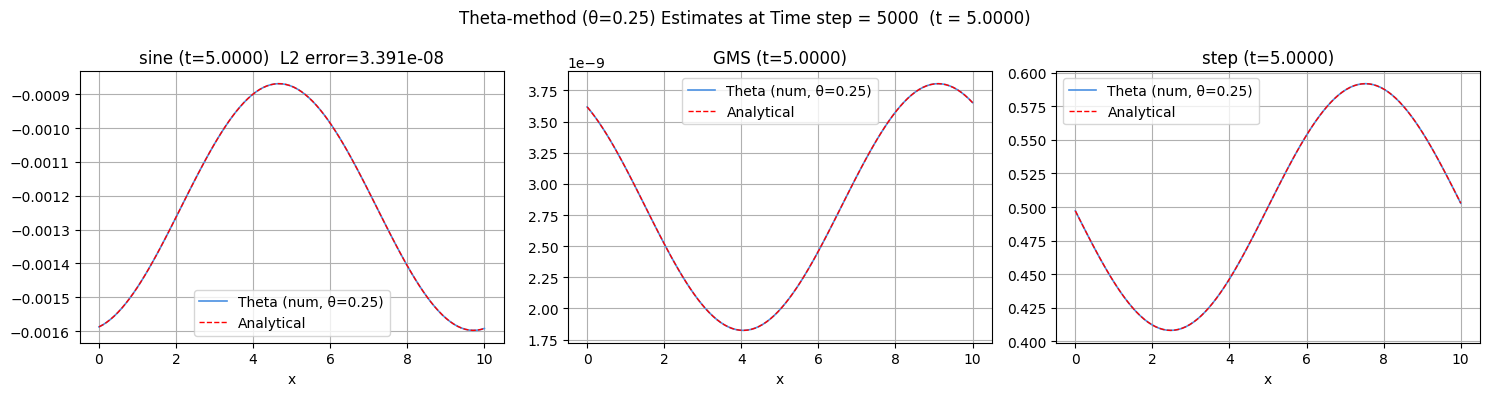

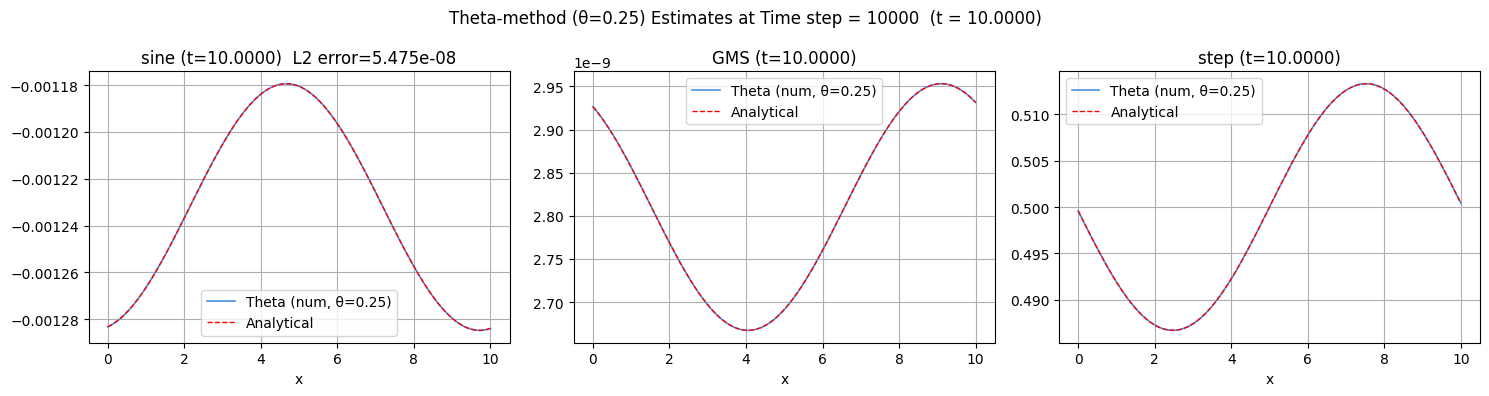

In [66]:

# stability warning/condition (theta < 0.5 => conditional)

if theta < 0.5:
    r_limit = 1.0 / (2.0 * (1.0 - 2.0 * theta))
    if r > r_limit:
        print(f"Unstable: for theta={theta} need r <= {r_limit:.6g}, got r={r:.6g}.")
    else:
        print(f"theta={theta:.3g} (explicit-leaning). r={r:.6g} <= {r_limit:.6g} ")
else:
    print(f"theta={theta:.3g} (implicit-leaning). r={r:.6g} (unconditionally stable)")

# initialize fields (match your naming)
theta_sin  = np.asarray(sin(x), dtype=np.float64)
theta_gms  = np.asarray(gms(x), dtype=np.float64)
theta_step = np.asarray(step(x), dtype=np.float64)


main_A = (1.0 + 2.0 * theta * r) * np.ones(N, dtype=np.float64)      # 1 - theta*r*(-2) = 1 + 2 theta r
off_A  = -theta * r * np.ones(N-1, dtype=np.float64)                 # -(theta*r)*1

main_B = (1.0 - 2.0 * (1.0 - theta) * r) * np.ones(N, dtype=np.float64)  # 1 + (1-theta) r *(-2)
off_B  = (1.0 - theta) * r * np.ones(N-1, dtype=np.float64)              # (1-theta) r * 1

    # dense assembly (fine for moderate Nx)
A = np.diag(main_A) + np.diag(off_A, k=1) + np.diag(off_A, k=-1)
B = np.diag(main_B) + np.diag(off_B, k=1) + np.diag(off_B, k=-1)
    # periodic corners
A[0, -1] = off_A[-1]
A[-1, 0] = off_A[-1]
B[0, -1] = off_B[-1]
B[-1, 0] = off_B[-1]

    # (Optional) LU factorization for speed: for dense use np.linalg.solve repeatedly (OK).
    # If Nx large and speed matters, use scipy.sparse.linalg.splu on sparse A.

# time-stepping
for timestep in range(nt + 1):
    rhs_sin  = B.dot(theta_sin)
    rhs_gms  = B.dot(theta_gms)
    rhs_step = B.dot(theta_step)

    theta_sin  = np.linalg.solve(A, rhs_sin)
    theta_gms  = np.linalg.solve(A, rhs_gms)
    theta_step = np.linalg.solve(A, rhs_step)

    # snapshots & plotting to match your style
    if timestep in [1, nt//2, nt]:
        t_now = timestep * dt
        fig, (ax_sin, ax_gms, ax_step) = plt.subplots(1, 3, figsize=(15, 4))
        fig.suptitle(f"Theta-method (θ={theta}) Estimates at Time step = {timestep}  (t = {t_now:.4f})")

        ax_sin.plot(x, theta_sin,  label=f"Theta (num, θ={theta})", linewidth=1.2, color="#4A90E2")
        ax_gms.plot(x, theta_gms,  label=f"Theta (num, θ={theta})", linewidth=1.2, color="#4A90E2")
        ax_step.plot(x, theta_step,label=f"Theta (num, θ={theta})", linewidth=1.2, color="#4A90E2")

        # analytic (via FFT evolution)
        u_sin_exact  = heat_analytical_solution(sin, x, t_now, alpha=alpha)
        u_gms_exact  = heat_analytical_solution(gms, x, t_now, alpha=alpha)
        u_step_exact = heat_analytical_solution(step, x, t_now, alpha=alpha)

        ax_sin.plot(x, u_sin_exact,   linestyle='--', label="Analytical", linewidth=1.0, color="red")
        ax_gms.plot(x, u_gms_exact,   linestyle='--', label="Analytical", linewidth=1.0, color="red")
        ax_step.plot(x, u_step_exact, linestyle='--', label="Analytical", linewidth=1.0, color="red")

        # optional diagnostics: L2 error for sine
        dx_local = dx
        L2_sin = np.sqrt(np.sum((theta_sin - u_sin_exact)**2) * dx_local)
        ax_sin.set_title(f"sine (t={t_now:.4f})  L2 error={L2_sin:.3e}")
        ax_gms.set_title(f"GMS (t={t_now:.4f})")
        ax_step.set_title(f"step (t={t_now:.4f})")

        for ax in (ax_sin, ax_gms, ax_step):
            ax.legend()
            ax.grid(True)
            ax.set_xlabel('x')
        plt.tight_layout()
        plt.show()